# A Computational Approach to S<sub>N</sub>1 Reactions
###### NB: This guide assumes you have progressed through "A Computational Approach to S<sub>N</sub>2 Reactions".


## Introduction
You have already been exposed to the computational approach to the S<sub>N</sub>2 reaction with ORCA and Avogadro, so that the preamble will be skipped here.

In this module, you will be guided through how to conduct a series of ORCA calculations and molecule building to provide a comparison in transition state energies. You will ideally gain an insight into why specific substrates proceed predominantly via a particular pathway in a series of solvents. Pay attention to the instructions, as these simulations require pre-work different from which you have already been exposed. Questions at the end of the notebook will guide your understanding and tie all the results together.

# Using Avogadro
Each reaction that will be conducted can be considered to proceed via seven unique steps, with <b>Step 2, Step 3 and Step 4</b> being the steps of interest. The difference in energy between Step 3 and Step 2 will be compared to S<sub>N</sub>2 for the forward pathway and Step 3 and Step 4 will be compared to S<sub>N</sub>2 for the backward pathway. These steps are displayed below, with the assumption of bromomethan as the substrate. 

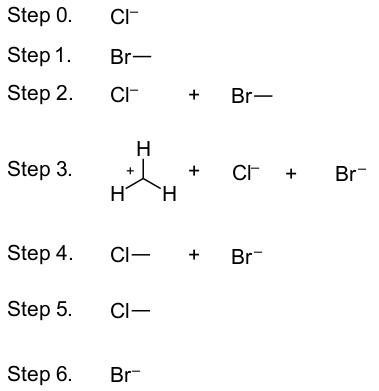

As can be seen, Step 3 elucidates that the transition state will be when the carbocation is formed as it will have the largest energy barrier to overcome (the largest activation energy), and Steps 2 and 4 are the reactant and product sets, respectively. To form this set of molecules to simulate, open Avogadro. Add a methane molecule, make it bromomethane, remove the C-Br bond and add a chloride ion. Optimize this set as you did in the previous workbook. Do note that the optimization will take a large amount of time, so let it optimize for a few seconds then manually stop it. You should end up with something like this. Notice the trigonal planar intermediate. Step 2 and 4 will be below Step 3.

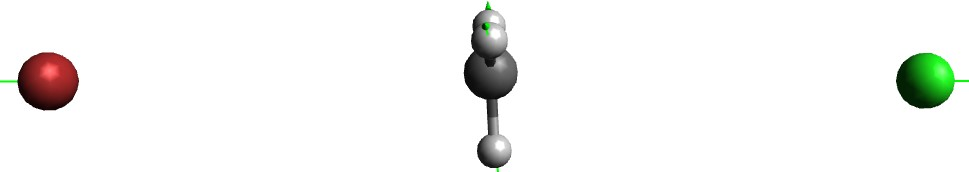

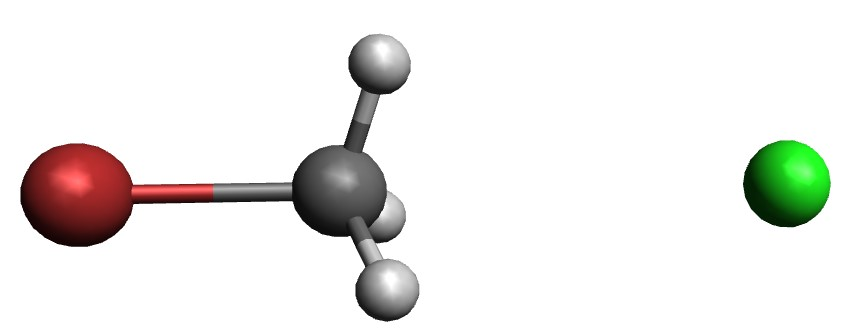

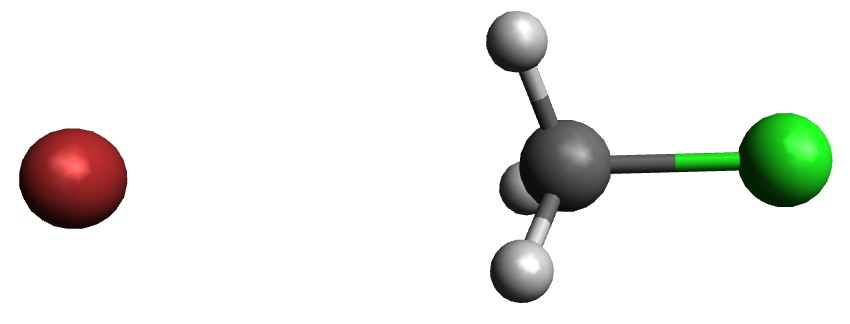

For this activity, we only need to optimize the geometry of this reaction set with ORCA. So generate the ORCA input file as you've done previously, with the settings below.

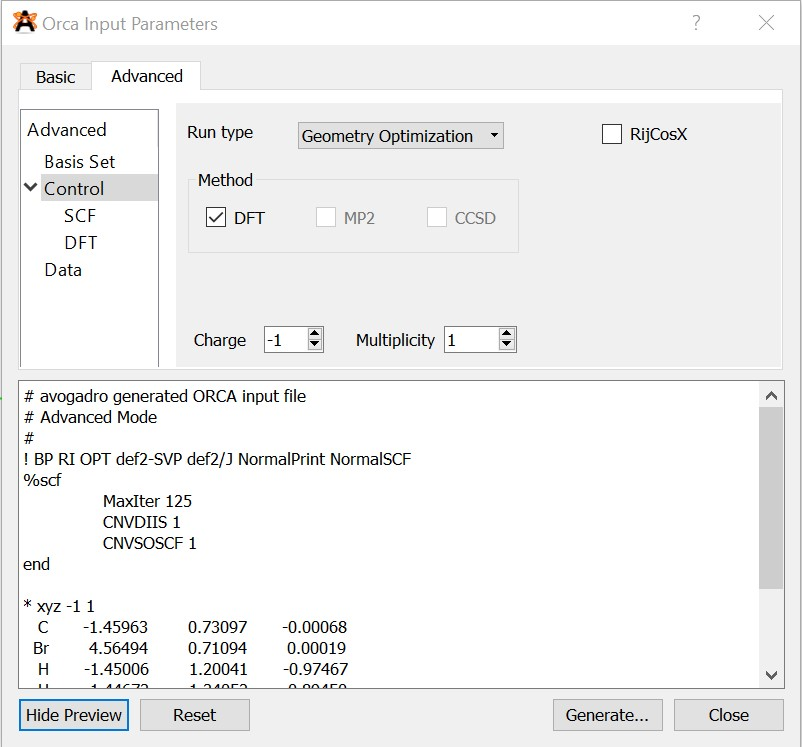

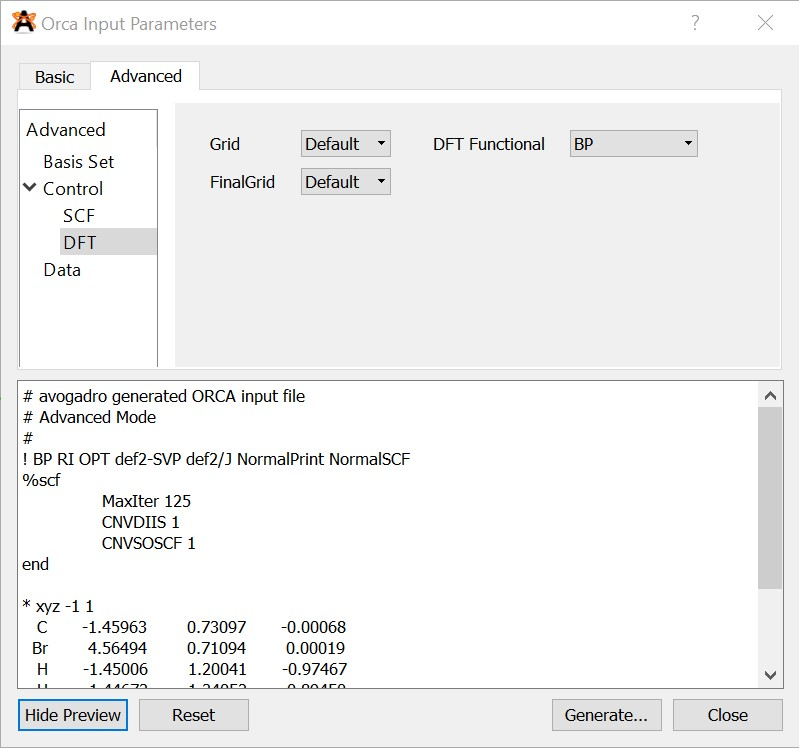

Please do this for the rest of the three substrates (bromoethane, isopropyl bromide and tert-butyl bromide), then upload it onto the virtual machine with the same naming scheme as you did in the previous notebook. Remember, for the water and acetonitrile files; you will need to put in the implicit solvent command as seen below.
```
! CPCM(Water)
```
or
```
! CPCM(Acetonitrile)
```
Run the geometry optimisation for all the uploaded files with:
```
orca SubstrateName_Optim.txt | tee SubstrateName_Optim.out ; orca SubstrateName_Optim.txt | tee SubstrateName_Optim.out ... etc.
```
A useful terminal command is <b>;</b>. If you put a semicolon at the end of a command (like the one above) and then another command after it, it will run the two commands in succession. You can do any number of commands like this, making each geometry optimisation much quicker with less user input.<br>

Once the geometry optimisations are done for all four substrates in each of the three solvents (gas phase, water and acetonitrile) for each of the three steps, you are done with dealing with ORCA and Avogadro and need to do the appropriate data manipulation to answer the questions.

In [1]:
#########################################################################################################################
# SN1 Code for Determining Transition State Energy                                                                      #                                                                                                                         #
#########################################################################################################################
rootDirStep2 = "Simulating_SN1/Acetonitrile/Isopropyl_Bromide/IsopropylBromide_Step2_Optim.engrad"
rootDirStep3 = "Simulating_SN1/Acetonitrile/Isopropyl_Bromide/IsopropylBromide_Step3_Optim.engrad"
rootDirStep4 = "Simulating_SN1/Acetonitrile/Isopropyl_Bromide/IsopropylBromide_Step4_Optim.engrad"
# Change the above variables to the file paths needed. The pre-filled paths should be similar. #

try:  
    with open (rootDirStep2, "r") as file:        
        energyStep2 = (float(file.readlines()[7])) * 2625.25

    with open (rootDirStep3, "r") as file:        
        energyStep3 = (float(file.readlines()[7])) * 2625.25

    with open (rootDirStep4, "r") as file:        
        energyStep4 = (float(file.readlines()[7])) * 2625.25

finally:
    file.close()
    
forward = energyStep3 - energyStep2
print("Energy of forward reaction is: ", round(forward), "kJ/mol \n")

backward = energyStep3 - energyStep4
print("Energy of reverse reaction is: ", round(backward), "kJ/mol \n")

total = backward - forward
print ("Total energy: ", round(total), "kJ/mol")

Energy of forward reaction is:  211 kJ/mol 

Energy of reverse reaction is:  250 kJ/mol 

Total energy:  39 kJ/mol


Here are the links to the other notebooks if needed:

[Link to Introduction Notebook](https://chem2000.webredirect.org/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2FNNCoffee%2FCRM-Computational-Project&urlpath=tree%2FCRM-Computational-Project%2FIntroduction+to+SN1+and+SN2+Reactions.ipynb&branch=master)<br>
[Link to SN2 Notebook](https://chem2000.webredirect.org/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2FNNCoffee%2FCRM-Computational-Project&urlpath=tree%2FCRM-Computational-Project%2FA+Computational+Approach+to+SN2+Reactions.ipynb&branch=main)

# Questions
1. What is the trend for <b>S<sub>N</sub>2</b> reactions? Order the substrates from lowest TS energy to highest TS energy is gas phase. Why is this the case?

2. What is the trend for <b>S<sub>N</sub>1</b> reactions? Order the substrates from lowest TS energy to highest TS energy is gas phase. Why is this the case?

3. Compare tert-butyl bromide in water for both reactions. Which reaction has the lower transition energy? Why?

4. Compare tert-butyl bromide in acetonitrile for both reactions. Which reaction has the lower transition energy? Why?

5. Compare tert-butyl bromide in gas phase for both reactions. Which reaction has the lower transition energy? Why?

6. Compare bromoethane in water to gas phase for the S<sub>N</sub>1 reaction. Which would you expect to have a lower TS energy?